Epoch 1/150
52/52 [==============================] - 291s 6s/step - loss: 3.6932 - accuracy: 0.4746 - val_loss: 5.1669 - val_accuracy: 0.4214
Epoch 2/150
52/52 [==============================] - 334s 6s/step - loss: 2.8403 - accuracy: 0.4901 - val_loss: 4.9327 - val_accuracy: 0.4127
Epoch 3/150
52/52 [==============================] - 402s 8s/step - loss: 2.6338 - accuracy: 0.5071 - val_loss: 4.3634 - val_accuracy: 0.4074
Epoch 4/150
52/52 [==============================] - 379s 7s/step - loss: 2.4990 - accuracy: 0.5177 - val_loss: 4.6166 - val_accuracy: 0.4167
Epoch 5/150
52/52 [==============================] - 397s 8s/step - loss: 2.3416 - accuracy: 0.5281 - val_loss: 4.9993 - val_accuracy: 0.4136
Epoch 6/150
52/52 [==============================] - 386s 7s/step - loss: 2.1225 - accuracy: 0.5406 - val_loss: 4.4593 - val_accuracy: 0.3552
Epoch 7/150
52/52 [==============================] - 403s 8s/step - loss: 1.9302 - accuracy: 0.5550 - val_loss: 5.5178 - val_accuracy: 0.1078
Epoch 

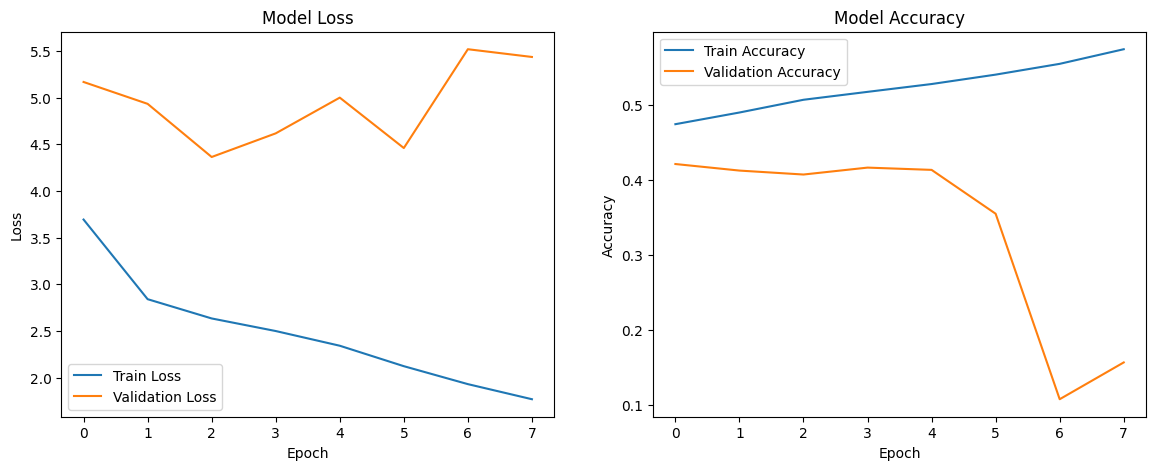

TypeError: 'Tensor' object cannot be interpreted as an integer

In [ ]:
from codes.transcription import model, utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

datasets = utils.datasets('music-transcription/wav','music-transcription/midi-like',32)
train, valid, test = datasets.retrieve()

transcriptor = model.EncoderDecoderModel()
transcriptor.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = transcriptor.fit(
    train,
    validation_data=valid,
    epochs=150,
    callbacks=[early_stopping]
)

utils.plot_training(history)
transcriptor.save('transcriptor-model')